# DATA UNDERSTANDING
1. Provinsi: Nama provinsi tempat data tersebut dikumpulkan.
2. Kab/Kota: Nama kabupaten atau kota di dalam provinsi tempat data tersebut berasal.
3. Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen): Persentase penduduk di kabupaten/kota yang dikategorikan sebagai miskin, berdasarkan indikator tertentu.
4. Rata-rata Lama Sekolah Penduduk 15+ (Tahun): menjelaskan tentang Rata-rata jumlah tahun pendidikan yang telah ditempuh oleh penduduk yang berusia 15 tahun ke atas.
5. Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun): Jumlah rata-rata pengeluaran per individu dalam satu tahun di kabupaten/kota tersebut, disesuaikan dengan faktor tertentu (biasanya inflasi).
6. Indeks Pembangunan Manusia (IPM): Indeks yang mengukur pencapaian dalam tiga dimensi dasar pembangunan manusia—umur panjang dan sehat, pengetahuan, dan standar hidup yang layak.
7. Umur Harapan Hidup (Tahun): Rata-rata perkiraan jumlah tahun seseorang diperkirakan akan hidup di suatu wilayah.
8. Persentase Rumah Tangga yang Memiliki Akses terhadap Sanitasi Layak: Persentase rumah tangga di kabupaten/kota yang memiliki akses terhadap fasilitas sanitasi yang memadai dan sesuai standar kesehatan.
9. Persentase Rumah Tangga yang Memiliki Akses terhadap Air Minum Layak: Persentase rumah tangga di kabupaten/kota yang memiliki akses terhadap sumber air minum yang aman dan sesuai dengan standar kebersihan.
10. Tingkat Pengangguran Terbuka: Persentase angkatan kerja yang tidak memiliki pekerjaan tetapi aktif mencari kerja di kabupaten/kota tersebut.
11. Tingkat Partisipasi Angkatan Kerja: Persentase penduduk usia kerja (biasanya di atas 15 tahun) yang aktif bekerja atau mencari pekerjaan di wilayah tersebut.
12. PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah): Produk Domestik Regional Bruto (PDRB) yang dihitung berdasarkan harga konstan, yang mengukur total nilai barang dan jasa yang diproduksi di wilayah tersebut dengan menghilangkan dampak inflasi.
13. Klasifikasi Kemiskinan: Kategori yang mengindikasikan apakah kabupaten/kota tersebut masuk ke dalam klasifikasi miskin atau tidak, berdasarkan indikator yang digunakan.

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [204]:
# Baca file CSV dengan delimiter ';'

df = pd.read_csv('Klasifikasi_Tingkat_Kemiskinan_di_Indonesia.csv', delimiter=';')

In [205]:
# cara menampilkan beberapa baris pertama untuk melihat data
df.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0


In [206]:
#cara menampilkan tipe data dari kolom

df.info()

#dapat di lihat data berikut terjadi missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object 
 7  

In [207]:
#fungsi ini sangat berguna untuk mendeteksi berapa banyak data yang hilang (missing value) di dalam dataset, 
#sehingga kita dapat memutuskan apakah ingin menghapus atau memperbaiki (impute) nilai yang hilang tersebut.

df.isna().sum()

Provinsi                                                                485
Kab/Kota                                                                485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            485
Indeks Pembangunan Manusia                                              485
Umur Harapan Hidup (Tahun)                                              485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     485
Persentase rumah tangga yang memiliki akses terhadap air minum layak    485
Tingkat Pengangguran Terbuka                                            485
Tingkat Partisipasi Angkatan Kerja                                      485
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              485
Klasifikasi Kemiskinan                                                  485
dtype: int64

## jadi dapat kita lihat bahwa terdapat 485 value yang hilang dalam data tersebut didalam semua kolom

Selain itu terdapat beberapa kolom yang tipe datanya tidak sesuai, maka dari itu kita haru menganti tipe data tersebut. berikut tipe data yang tidak sesuai :
1. Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen) Tipe Data Object Ke Float
2. Rata-rata Lama Sekolah Penduduk 15+ (Tahun) Tipe Data Object Ke int
3. Indeks Pembangunan Manusia Tipe Data Object Ke Float
4. Umur Harapan Hidup (Tahun) Tipe Data Object Ke Int
5. Persentase rumah tangga yang memiliki akses terhadap sanitasi layak Tipe Data Object Ke Float
6. Persentase rumah tangga yang memiliki akses terhadap air minum layak Tipe Data Object Ke Float
7. Tingkat Pengangguran Terbuka Tipe Data Object Ke Float
8. Tingkat Partisipasi Angkatan Kerja Tipe Data Object Ke Float 
9. Klasifikasi kemiskinan tipe data Float ke int

In [208]:
# cara mengecek persentase missing Value
df.isnull().sum()/len(df)*100

Provinsi                                                                48.548549
Kab/Kota                                                                48.548549
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         48.548549
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             48.548549
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            48.548549
Indeks Pembangunan Manusia                                              48.548549
Umur Harapan Hidup (Tahun)                                              48.548549
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     48.548549
Persentase rumah tangga yang memiliki akses terhadap air minum layak    48.548549
Tingkat Pengangguran Terbuka                                            48.548549
Tingkat Partisipasi Angkatan Kerja                                      48.548549
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              48.548549
Klasifikasi Kemi

## Jadi dari Explorasi diatas masalah yang harus di selesaikan :
- drop kolom yang mengalami missing value sebesar 48.5% dikarena kan > 20% dan jika diisi maka kualitas akan berkurang karena terlalu besar data yang akan diisi
- Kemudian mengganti tipe data yang tidak sesuai

In [209]:
# mengdrop data yang missing value

df = df.dropna(how='all')

#berfungsi untuk menghapus baris dalam DataFrame df yang semua nilai dalam baris tersebut adalah NaN (null).
#hal ini sangat berguna untuk membersihkan data dari baris-baris yang tidak memiliki informasi apa pun (seluruhnya NaN), 
#tetapi tetap menjaga baris yang mungkin masih memiliki sebagian data yang bisa digunakan.

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object 
 7  

# Cleansing data

In [211]:
# mengubah type data 'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'

df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'] = df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'].str.replace(',', '.').astype(float)

In [212]:
# mengubah type data 'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'

df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'] = df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'].str.replace(',', '.').astype(float)

In [213]:
#kemudian ubah ke tipe data integer
df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'] = df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'].astype(int)

In [214]:
df['Indeks Pembangunan Manusia'] = df['Indeks Pembangunan Manusia'].str.replace(',', '.').astype(float)

In [215]:
df['Umur Harapan Hidup (Tahun)'] = df['Umur Harapan Hidup (Tahun)'].str.replace(',', '.').astype(float)

In [216]:
df['Persentase rumah tangga yang memiliki akses terhadap sanitasi layak'] = df['Persentase rumah tangga yang memiliki akses terhadap sanitasi layak'].str.replace(',', '.').astype(float)

In [217]:
df['Persentase rumah tangga yang memiliki akses terhadap air minum layak'] = df['Persentase rumah tangga yang memiliki akses terhadap air minum layak'].str.replace(',', '.').astype(float)

In [218]:
df['Tingkat Pengangguran Terbuka'] = df['Tingkat Pengangguran Terbuka'].str.replace(',', '.').astype(float)

In [219]:
df['Tingkat Partisipasi Angkatan Kerja'] = df['Tingkat Partisipasi Angkatan Kerja'].str.replace(',', '.').astype(float)

In [220]:
df['Klasifikasi Kemiskinan'] = df['Klasifikasi Kemiskinan'].astype(int)

In [221]:
#pengecekan ulang karena data sudah di drop dan tipe data sudah di ubah

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    int32  
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 7  

# visualisasi

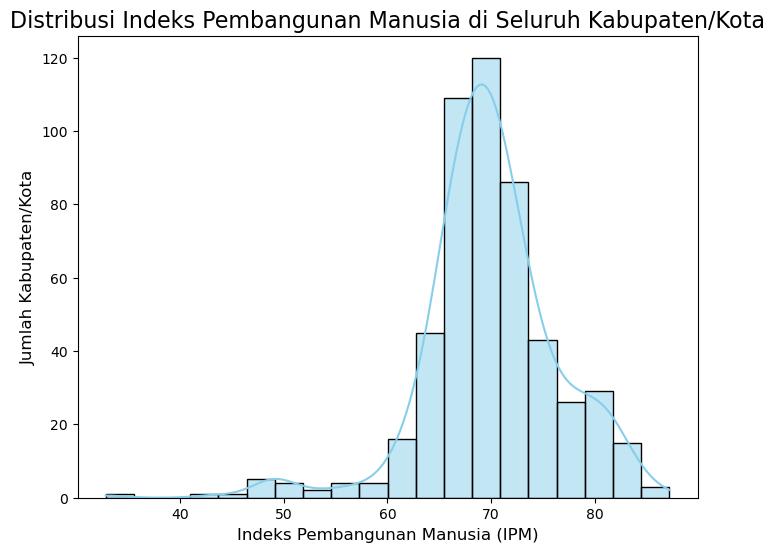

In [224]:
# Mengatur ukuran plot
plt.figure(figsize=(8, 6))

# Membuat histogram menggunakan seaborn
sns.histplot(df['Indeks Pembangunan Manusia'], bins=20, kde=True, color='skyblue')

# tambahkan judul dan label sumbu
plt.title('Distribusi Indeks Pembangunan Manusia di Seluruh Kabupaten/Kota', fontsize=16)
plt.xlabel('Indeks Pembangunan Manusia (IPM)', fontsize=12)
plt.ylabel('Jumlah Kabupaten/Kota', fontsize=12)

# Menampilkan plot
plt.show()

## memvisualisasikan distribusi indeks pembangunan manusia diseluruh kabupaten/kota
dilihat dari hasil visualisasi dijelaskan bahwa sebagian besar kabupaten/kota di indonesia mempunyai rata rata IPM yang termasuk kategori menengah sekitar 65-70. Namun ada beberapa daerah yang tertinggal dengan IPM yang lebih rendah, hal ini perlu diperhatikan lebih agar dapat meningkatkan pembangunan manusia di wilayah tersebut. 

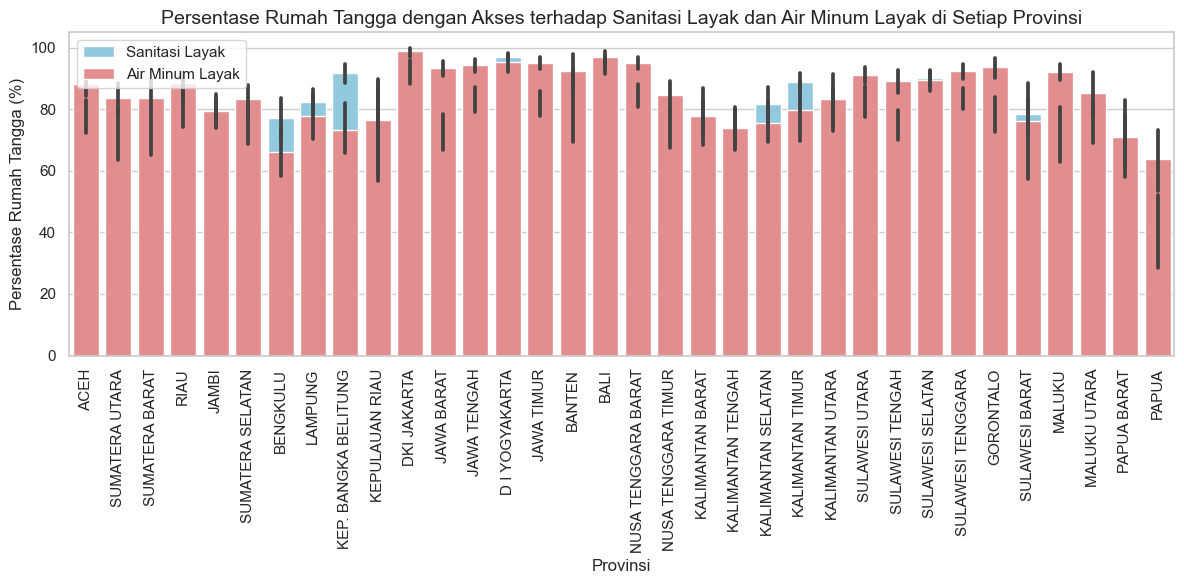

In [225]:
# Menyiapkan ukuran plot
plt.figure(figsize=(12, 6))

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot untuk akses terhadap sanitasi layak
sns.barplot(x='Provinsi', y='Persentase rumah tangga yang memiliki akses terhadap sanitasi layak', 
            data=df, color='skyblue', label='Sanitasi Layak')

# Membuat bar plot untuk akses terhadap air minum layak
sns.barplot(x='Provinsi', y='Persentase rumah tangga yang memiliki akses terhadap air minum layak', 
            data=df, color='lightcoral', label='Air Minum Layak')

# Memutar label x agar tidak tumpang tindih
plt.xticks(rotation=90)

# tambahkan judul dan label sumbu
plt.title('Persentase Rumah Tangga dengan Akses terhadap Sanitasi Layak dan Air Minum Layak di Setiap Provinsi', fontsize=14)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Persentase Rumah Tangga (%)', fontsize=12)

# Menampilkan legenda
plt.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()


## visualisasi persentasi rumah tangga dengan akses terhadap sanitasi layak dan akses terhadap air minum layak

dari hasil visualisasi diatas menghasil beberapa keputusan :
1. Provinsi seperti DKI Jakarta, DI Yogyakarta, dan beberapa provinsi di Jawa memiliki akses air minum dan sanitasi yang relatif baik.
2. namun Provinsi Papua dan beberapa wilayah lain di timur Indonesia cenderung memiliki akses sanitasi dan air minum yang lebih rendah, yang dapat menjadi area fokus peningkatan infrastruktur.

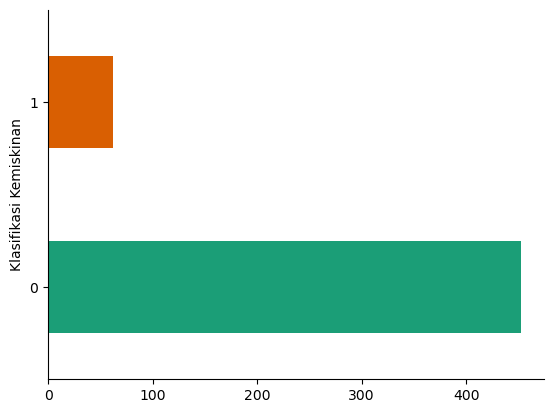

In [192]:
#kita kelompokan untuk klasifikasi kemiskinan agar kita dapat dengan mudah membaca berapa banyak masyarakat yang miskin dan tidak miskin di indonesia
#jadi disini dapat dilihat bahwa tingkat kemiskinan di indonesia tidak sebesar tingkat ketidak miskinan 

df.groupby('Klasifikasi Kemiskinan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Hubungan antar variabel 

variabel pengeluaran per kapita di sesuaikan (ribu rupiah/Orang/Tahun) = untuk SUMBU X
variable Indeks pembangunan Manusia = untuk SUMBU Y

<Axes: xlabel='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)', ylabel='Indeks Pembangunan Manusia'>

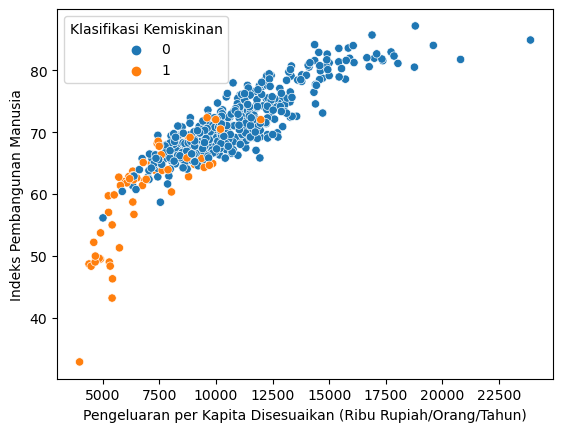

In [193]:
# memvisualisasikan hubungan antara dua variabel dengan membedakan data berdasarkan klasifikasi kemiskinan

sns.scatterplot(x=df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'], y=df['Indeks Pembangunan Manusia'], hue=df['Klasifikasi Kemiskinan'])


#pola yang dihasilkan yaitu pola positif dimana, korelasi positif antara pengeluaran per kapita dan indeks pembangunan manusia. 
#Ini berarti bahwa wilayah dengan pengeluaran yang lebih tinggi biasanya memiliki Indek Pembangunan Manusia yang lebih baik, yang masuk akal karena pengeluaran yang lebih besar mencerminkan akses yang lebih baik ke pendidikan, layanan kesehatan, dan standar hidup.

## Dari Data Klasifikasi_Tingkat_Kemiskinan_di_Indonesia maka kami memilih Decission Tree Classifer. Alasan memilih Algoritma Decission Tree Classifer :

- Karena kita menggunakan data yang berisi informasi label biner dimana 0 artinya Tidak miskin dan 1 artinya Miskin dalam melakukan prediksi.
- model decission tree mudah dalam membuat model dan interprestasi, decission tree juga tidak bergantung pada asumsi linearitas.
- visualisasi lebih mudah dipahami

kami lebih memilih Decision Tree karena Algoritma ini membuat keputusan berdasarkan aturan-aturan yang dipelajari dari data latih dan sangat cocok untuk masalah klasifikasi biner seperti kemiskinan (0 dan 1).


### Mengapa Tidak Menggunakan Algoritma K-Means?
Untuk masalah klasifikasi kemiskinan, lebih baik menggunakan algoritma supervised learning seperti Decision Tree, Random Forest, atau Logistic Regression karena mereka dirancang untuk mempelajari hubungan antara fitur dan label yang diberikan. K-Means tidak cocok karena merupakan algoritma unsupervised yang tidak menggunakan informasi label selama proses klastering.


In [194]:
# Menyiapkan fitur dan label
X = df[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)']]  # Fitur yang digunakan
y = df['Klasifikasi Kemiskinan']  # Label atau target

In [195]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

Membagi data menjadi dua subsetmerupakan salah satu cara ntuk melatih model (train) dan satu lagi untuk mengevaluasi performa model (test). hal ini penting untuk memastikan bahwa model yang dibangun bisa berkinerja baik pada data yang belum pernah uji, bukan hanya pada data yang sudah dilatih.

In [196]:
# Membuat model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=21)

In [197]:
# Melatih model dengan data latih
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [198]:
# Memprediksi klasifikasi pada data uji
y_pred = decision_tree.predict(X_test)

Kode yang tersebut digunakan untuk melakukan prediksi klasifikasi pada data uji menggunakan model Decision Tree yang telah dibuat sebelumnya.
Tujuannya adalah untuk mengklasifikasikan data uji (X_test) dengan menggunakan model Decision Tree yang telah dibuat dan dilatih. Setelah menjalankan kode ini, y_pred akan berisi label kelas yang diprediksi untuk setiap entri dalam data uji.
Hasil ini kemudian dapat digunakan untuk mengevaluasi kinerja model, seperti menghitung akurasi, precision, recall, atau metrik evaluasi lainnya dengan membandingkannya dengan label asli dari data uji.

In [199]:
# Menghitung akurasi model
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Akurasi Decision Tree: {accuracy_dt}")

Akurasi Decision Tree: 0.967741935483871


Nilai ini menghasilkan bahwa model Decision Tree memiliki akurasi sebesar 96,77%.
Ini berarti bahwa sekitar 96,77% dari prediksi yang dibuat oleh model pada data uji adalah benar.
Hasil ini menunjukkan bahwa model memiliki kinerja yang sangat baik dalam mengklasifikasikan data uji.

In [1]:
#visualisasi decission tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=['Persentase Penduduk Miskin (P0)'], class_names=['Tidak Miskin', 'Miskin'])
plt.title("Visualisasi Decision Tree")
plt.show()


NameError: name 'decision_tree' is not defined

<Figure size 1200x800 with 0 Axes>

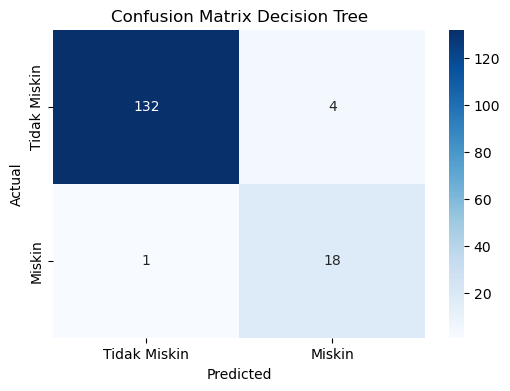

In [201]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Decision Tree')
plt.show()


# Percobaan menggunakan Algoritma K-MEANS

In [104]:
X_cluster = df[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', 'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)']]

kita buat variabel baru dengan nama = X_cluster dimana berfungsi untuk memilih dua kolom dari dataframe df dan menyimpan nya dalam nama variabel baru

In [105]:
kmeans = KMeans(n_clusters=2, random_state=21)
df['Klaster K-Means'] = kmeans.fit_predict(X_cluster)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Code diatas dibuat dengan tujuan membuat X_cluster menjadi dua klaster dengan menggunakan Algoritma K-Mean, kemudian di simpan hasil klasterisasi tersebut dalam kolom Klaster K-Mean pada dataframennya

In [106]:
# Tahap terakhir yaitu mengecek akurasi K-Mean yang di hasilkan

accuracy_nb = accuracy_score(df['Klasifikasi Kemiskinan'], df['Klaster K-Means'])
print(f"Akurasi K-Means: {accuracy_nb}")

Akurasi K-Means: 0.03696498054474708
